In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

from sklearn import model_selection, decomposition, preprocessing
from sklearn import linear_model, tree, ensemble

In [60]:
customer_data = pd.read_csv("mergedcustomers.csv")

# Drop the ID column
customer_data = customer_data.drop(['ID'], axis=1)
# Show table column names and contents
print(customer_data.columns)
customer_data

Index(['CHURNRISK', 'GENDER', 'STATUS', 'CHILDREN', 'ESTINCOME', 'HOMEOWNER',
       'AGE', 'TOTALDOLLARVALUETRADED', 'TOTALUNITSTRADED',
       'LARGESTSINGLETRANSACTION', 'SMALLESTSINGLETRANSACTION',
       'PERCENTCHANGECALCULATION', 'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE',
       'NETREALIZEDGAINS_YTD', 'NETREALIZEDLOSSES_YTD'],
      dtype='object')


,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,Medium,M,M,2,28766.90,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,Low,M,M,2,91272.20,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,Low,F,S,0,73228.30,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,High,M,M,1,64792.30,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,High,F,S,0,93322.10,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,High,F,S,0,64319.20,N,41,3010.30,37,752.5750,75.25750,5.55,1,18,0.0000,150.51500
2062,Medium,F,S,1,73338.00,N,48,20922.09,9,10461.0450,1046.10450,2.25,1,9,0.0000,1046.10450
2063,Medium,F,S,0,433.74,N,61,3300.33,40,825.0825,82.50825,6.00,5,11,0.0000,82.50825
2064,Low,F,M,2,16962.20,N,45,18601.86,8,9300.9300,930.09300,2.00,1,5,930.0930,0.00000


In [61]:
## For illustration, let's try to predict churn risk purely on platform
## behavior, i.e., no personal info like age and gender. The table 
## conveniently places these as the last 9 columns.

print(customer_data.columns[-9:])

feature_cols = customer_data.columns[-9:] 
target_col = "CHURNRISK"

features = customer_data.loc[:, feature_cols]
target = customer_data.loc[:, target_col]

## We then split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, train_size = 0.8, random_state = 0)
    

Index(['TOTALDOLLARVALUETRADED', 'TOTALUNITSTRADED',
       'LARGESTSINGLETRANSACTION', 'SMALLESTSINGLETRANSACTION',
       'PERCENTCHANGECALCULATION', 'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE',
       'NETREALIZEDGAINS_YTD', 'NETREALIZEDLOSSES_YTD'],
      dtype='object')


In [62]:
# Initialize DecisionTreeClassifier and fit the model to the training data
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

# Using the fitted model, predict the classification of the galaxies that
# are part of the test set (X_test)
y_pred = model.predict(X_test)

pred_actual_df = pd.DataFrame([y_pred, y_test]).T
pred_actual_df.columns = ["Predicted", "Actual"]
pred_actual_df

,Predicted,Actual
0,Medium,High
1,High,High
2,High,High
3,High,High
4,High,High
...,...,...
409,Low,Low
410,Medium,Medium
411,Low,Low
412,Medium,Medium


<Axes: xlabel='Actual', ylabel='Predicted'>

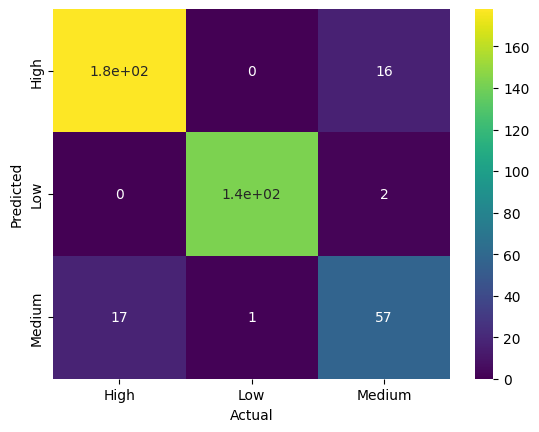

In [63]:
# We can visualize the performance of the classification by producing
# the confusion matrix. 

conf_matrix = pd.crosstab(pred_actual_df["Predicted"], pred_actual_df["Actual"])
sns.heatmap(conf_matrix, annot = True, cmap = "viridis")

<Axes: xlabel='Actual', ylabel='Predicted'>

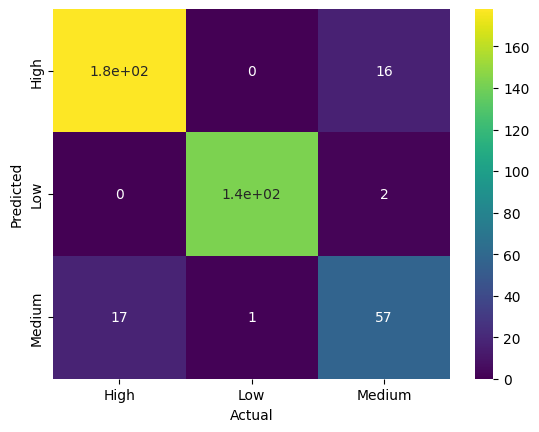

In [64]:
# What's nifty about sklearn is that we have an entire library of
# machine learning algorithms with similar interfaces. Switching
# from one algorithm to another is almost as simple as changing the
# model class the data is being fed into.

perceptron = linear_model.Perceptron()
perceptron.fit(X_train, y_train)

y_pred = model.predict(X_test)
pred_actual_df = pd.DataFrame([y_pred, y_test]).T
pred_actual_df.columns = ["Predicted", "Actual"]
conf_matrix = pd.crosstab(pred_actual_df["Predicted"], pred_actual_df["Actual"])

sns.heatmap(conf_matrix, annot = True, cmap = "viridis")

In [65]:
## Sometimes people opt to use categorical data itself as features
## of the input data, but the model expects the inputs to be numerical
## values. We need to preprocess these columns, the simples of which
## is putting them in a one-hot encoder.

feature_cols = ["GENDER", "STATUS", "HOMEOWNER"]
features = customer_data.loc[:, feature_cols]

# Feed the columns with categorical data into the encoder
encoder = preprocessing.OneHotEncoder()
encoder.fit(features)

# Fetch the encoding output. These can then be fed as additional
# columns into your classifier.
ohc_feats = encoder.fit_transform(features).toarray()
ohc_colnames = encoder.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feats, columns=ohc_colnames)

# Print the output of the encoder,  which should all be numbers. Note
# that one-hot encoding the HOMEOWNER feature is redundant, since it
# is already binary and can be encoded into a single column.
ohc_df

,GENDER_F,GENDER_M,STATUS_D,STATUS_M,STATUS_S,HOMEOWNER_N,HOMEOWNER_Y
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
2061,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2062,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2063,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2064,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [66]:
new_data = pd.read_csv('sdss_specgals.csv')

new_data

,ra,dec,mjd,plate,fiberID,z,zErr,rChi2,velDisp,velDispErr,...,h_beta_flux_err,h_delta_flux,h_delta_flux_err,d4000,d4000_err,bptclass,lgm_tot_p50,sfr_tot_p50,objID,specObjID
0,146.714191,-1.041276,51630,266,1,0.021222,0.000009,1.500621,131.863570,4.193524,...,6.650275,23.382048,6.433518,1.864510,0.014446,3.0,10.294713,-0.527342,1.237649e+18,2.994897e+17
1,146.744142,-0.652220,51630,266,2,0.203783,0.000039,1.302946,174.164760,13.752029,...,2.697799,1.221214,2.102120,2.157893,0.054713,-1.0,11.365371,-0.772339,1.237651e+18,2.994900e+17
2,146.628573,-0.765147,51630,266,4,0.064656,0.000021,1.227629,123.036330,9.821034,...,2.906838,6.669699,3.581208,1.798716,0.030005,3.0,10.565862,-1.155230,1.237651e+18,2.994905e+17
3,146.631673,-0.988261,51630,266,6,0.052654,0.000009,1.404003,41.803913,24.241034,...,2.279489,11.307991,3.058364,1.388878,0.033203,1.0,9.363875,-0.411009,1.237649e+18,2.994911e+17
4,146.919416,-0.990517,51630,266,7,0.213861,0.000040,1.332148,143.521130,14.563519,...,2.622802,0.239994,2.116303,1.923569,0.047452,-1.0,11.161670,-0.350026,1.237649e+18,2.994913e+17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241462,133.788425,35.078652,52964,1211,393,0.085286,0.000023,0.889491,123.967580,9.107684,...,2.181970,4.646664,2.159924,2.003992,0.034340,-1.0,10.676318,-1.369711,1.237665e+18,1.363573e+18
241463,133.682582,35.044644,52964,1211,394,0.132971,0.000020,0.951787,134.010850,14.322441,...,2.571374,5.817954,2.435693,1.675710,0.022132,5.0,10.844920,0.419944,1.237660e+18,1.363573e+18
241464,133.805152,34.956012,52964,1211,396,0.084818,0.000022,0.941270,142.813800,8.119213,...,1.615731,-1.660927,1.666363,1.982068,0.029724,-1.0,10.627944,-0.983334,1.237660e+18,1.363574e+18
241465,133.816014,34.988375,52964,1211,397,0.177586,0.000035,1.110161,215.482030,13.059266,...,3.334544,7.299587,2.904170,1.775509,0.024958,2.0,11.173192,0.012215,1.237660e+18,1.363574e+18


In [79]:
print(new_data.columns)


Index(['ra', 'dec', 'mjd', 'plate', 'fiberID', 'z', 'zErr', 'rChi2', 'velDisp',
       'velDispErr', 'extinction_r', 'petroMag_r', 'psfMag_r', 'psfMagErr_r',
       'modelMag_u', 'modelMagErr_u', 'modelMag_g', 'modelMagErr_g',
       'modelMag_r', 'modelMagErr_r', 'modelMag_i', 'modelMagErr_i',
       'modelMag_z', 'modelMagErr_z', 'petroR50_r', 'petroR90_r',
       'nii_6584_flux', 'nii_6584_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
       'h_beta_flux', 'h_beta_flux_err', 'h_delta_flux', 'h_delta_flux_err',
       'd4000', 'd4000_err', 'bptclass', 'lgm_tot_p50', 'sfr_tot_p50', 'objID',
       'specObjID'],
      dtype='object')


In [84]:
feature_cols = [
    'nii_6584_flux', 'h_alpha_flux', 'oiii_5007_flux', 'h_beta_flux', 'h_delta_flux',
    'nii_6584_flux_err', 'h_alpha_flux_err', 'oiii_5007_flux_err', 'h_beta_flux_err', 'h_delta_flux_err',
    'z', 'd4000', 'petroR50_r', 'petroR90_r', 'lgm_tot_p50', 'sfr_tot_p50',
    'modelMag_u', 'modelMagErr_u', 'modelMag_g', 'modelMagErr_g',
       'modelMag_r'  # Individual columns
]

target_col = "bptclass"

features = new_data.loc[:, feature_cols]
target = new_data.loc[:, target_col]

## We then split the dataset into training and testing sets.
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(
    features, target, train_size = 0.8, random_state = 0)

In [85]:
# Initialize DecisionTreeClassifier and fit the model to the training data
model = tree.DecisionTreeClassifier()
model.fit(XX_train, yy_train)

# Using the fitted model, predict the classification of the galaxies that
# are part of the test set (X_test)
yy_pred = model.predict(XX_test)

pred_actual_df = pd.DataFrame([yy_pred, yy_test]).T
pred_actual_df.columns = ["Predicted", "Actual"]
pred_actual_df

,Predicted,Actual
0,3.0,3.0
1,-1.0,-1.0
2,2.0,2.0
3,4.0,3.0
4,-1.0,-1.0
...,...,...
48289,1.0,1.0
48290,1.0,3.0
48291,3.0,3.0
48292,-1.0,-1.0


<Axes: xlabel='Actual', ylabel='Predicted'>

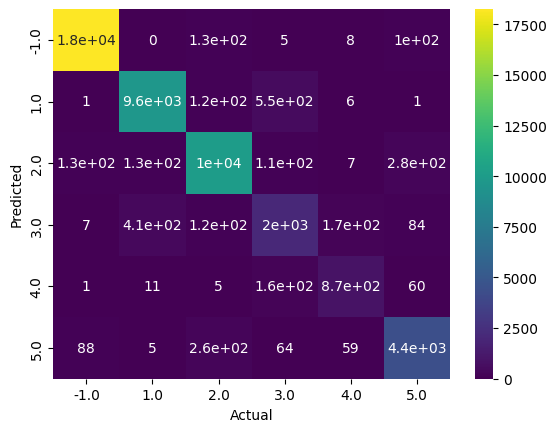

In [86]:
conf_matrix = pd.crosstab(pred_actual_df["Predicted"], pred_actual_df["Actual"])
sns.heatmap(conf_matrix, annot = True, cmap = "viridis")

/Users/johnrobertarao/Documents/Codes and stuff/.venv/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


<Axes: xlabel='Actual', ylabel='Predicted'>

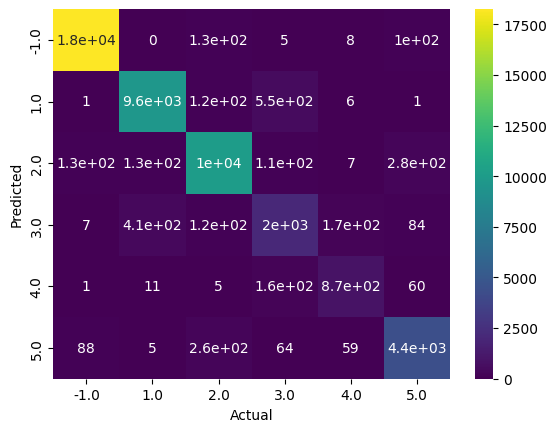

In [87]:
perceptron = linear_model.Perceptron()
perceptron.fit(XX_train, yy_train)

yy_pred = model.predict(XX_test)
pred_actual_df = pd.DataFrame([yy_pred, yy_test]).T
pred_actual_df.columns = ["Predicted", "Actual"]
conf_matrix = pd.crosstab(pred_actual_df["Predicted"], pred_actual_df["Actual"])

sns.heatmap(conf_matrix, annot = True, cmap = "viridis")

<Axes: xlabel='Actual', ylabel='Predicted'>

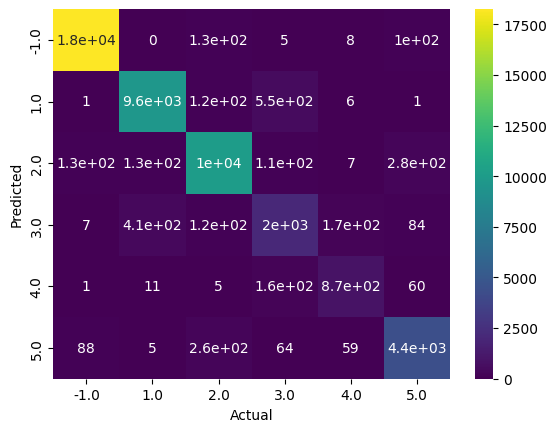

In [88]:
Adaboost = ensemble.AdaBoostClassifier()
Adaboost.fit(XX_train, yy_train)

yy_pred = model.predict(XX_test)
pred_actual_df = pd.DataFrame([yy_pred, yy_test]).T
pred_actual_df.columns = ["Predicted", "Actual"]
conf_matrix = pd.crosstab(pred_actual_df["Predicted"], pred_actual_df["Actual"])

sns.heatmap(conf_matrix, annot = True, cmap = "viridis")